In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from celluloid import Camera
from scipy.stats import beta

from samples.rl.bandit import (
    Bandit,
    BernoulliBandit,
)
from samples.rl.thompson_sampling import BayesianAgent
from samples.rl.ucb import (
    UCB1Agent,
    UCB1TunedAgent,
    UCB1NormalAgent,
)
from samples.rl.utils import compare_agents

%matplotlib notebook
# %matplotlib inline

plt.style.use('ggplot')

<IPython.core.display.Javascript object>


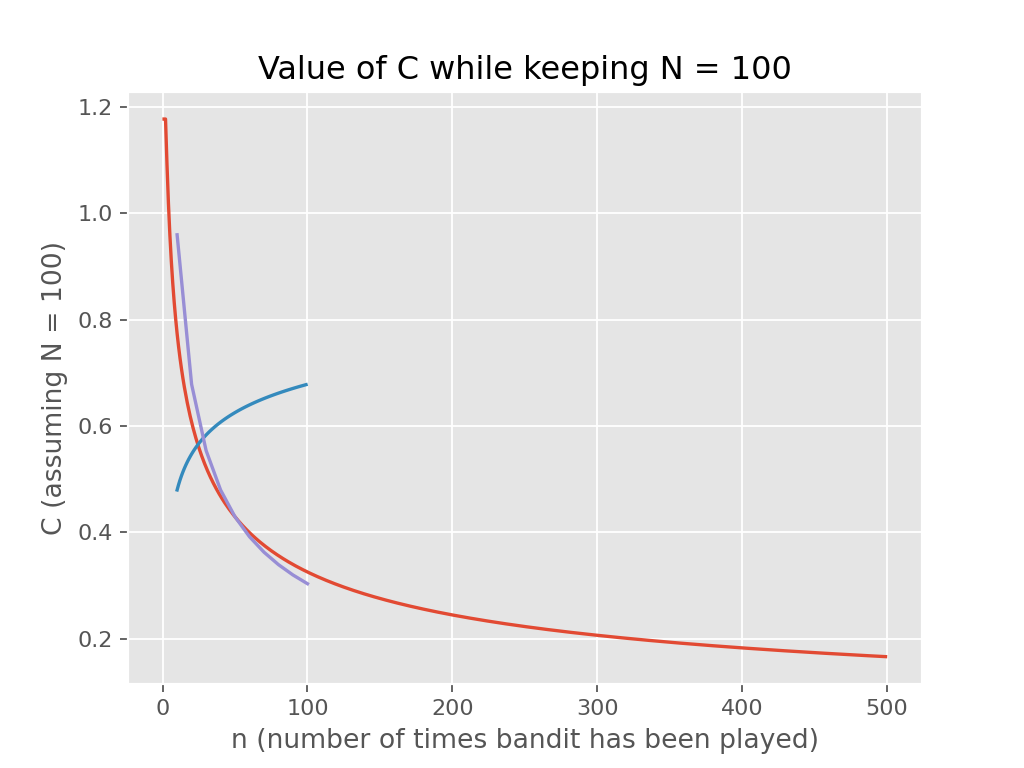

In [2]:
n = np.arange(1, 500)
N = 2 * n

plt.plot(n, np.sqrt(2 * np.log(N) / n))
plt.xlabel('n (number of times bandit has been played)')
plt.ylabel('C (assuming N = 2n)')
plt.title('Value of C while keeping N = 2n')
plt.show()

<IPython.core.display.Javascript object>


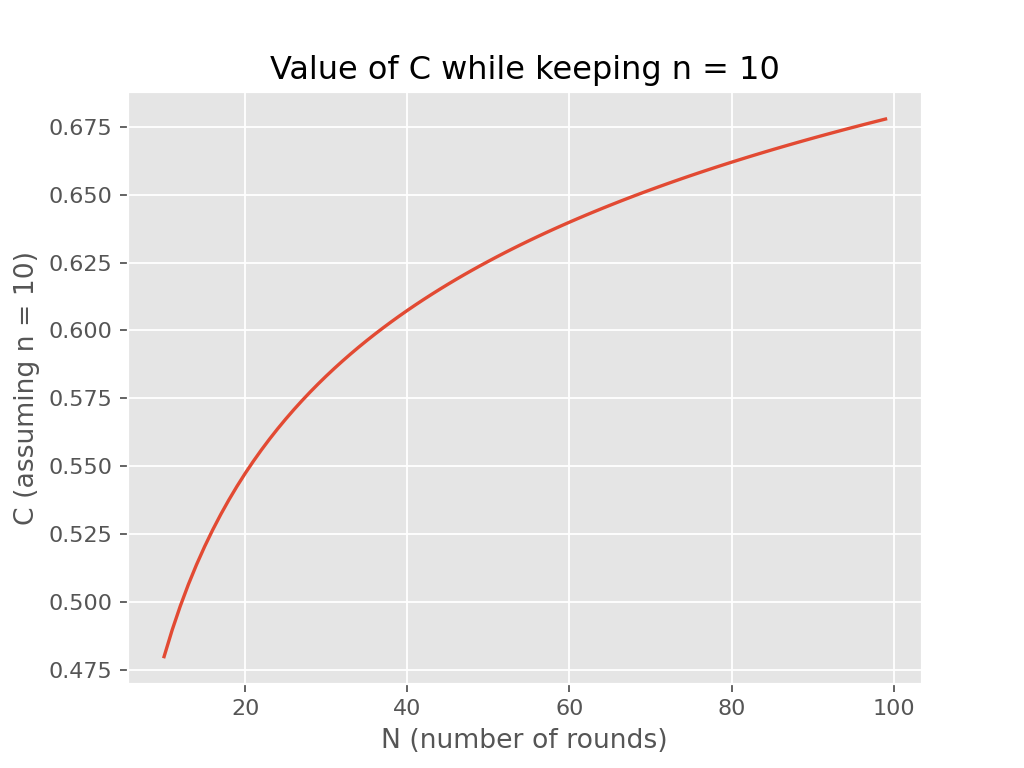

In [5]:
N = np.arange(10, 100)
n = [20] * len(N)

plt.plot(N, np.sqrt(2 * np.log(N) / n))
plt.xlabel('N (number of rounds)')
plt.ylabel('C (assuming n = 10)')
plt.title('Value of C while keeping n = 10')
plt.show()

<IPython.core.display.Javascript object>


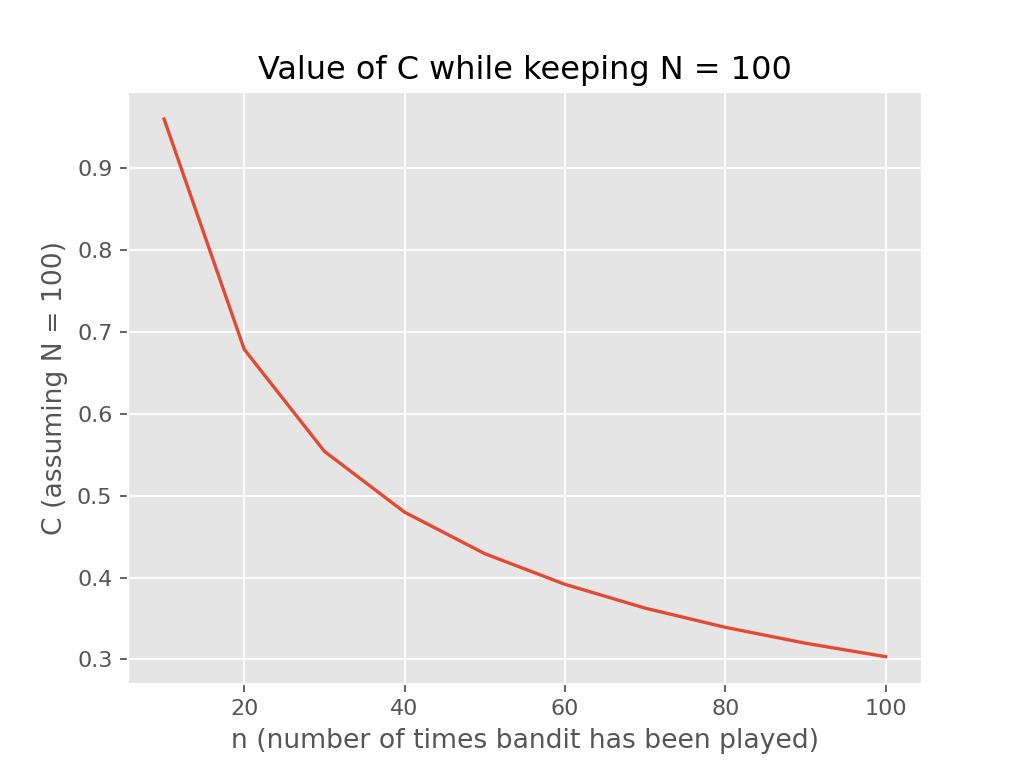

In [6]:
n = np.arange(0.1, 1.1, 0.1) * 100
N = [100] * len(n)

plt.plot(n, np.sqrt(2 * np.log(N) / n))
plt.xlabel('n (number of times bandit has been played)')
plt.ylabel('C (assuming N = 100)')
plt.title('Value of C while keeping N = 100')
plt.show()

In [ ]:
class GifGenerator:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.bernoulli_probs = [0.6, 0.7, 0.8, 0.9]
        self.actions_per_iter = 5
        
    def prepare_for_run(self, iterations):
        self.agent = UCB1Agent()
        self.agent.bandits = [BernoulliBandit(p) for p in self.bernoulli_probs]
        self.agent.initialise()

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        uci = [self.agent.calculate_bandit_index(b) for b in self.agent.bandits]
        
        # axis 1: upper confidence index
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=uci, ax=self.ax1)
        self.ax1.set(xlabel='Upper Confidence Index', ylabel='Bandits')
        
        # axis 2: bandit trials
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=trials, ax=self.ax2)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        sample_mean = [
            self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions'] 
            for b in self.agent.bandits
        ]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=sample_mean, ax=self.ax3)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

In [ ]:
gg = GifGenerator()
animation = gg.create_animation(200, interval=400)
animation.save('ucb1.gif', writer='imagemagick')

In [ ]:
class GifGeneratorTuned:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.bernoulli_probs = [0.6, 0.7, 0.8, 0.9]
        self.actions_per_iter = 5
        
    def prepare_for_run(self, iterations):
        self.agent = UCB1TunedAgent()
        self.agent.bandits = [BernoulliBandit(p) for p in self.bernoulli_probs]
        self.agent.initialise()

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        uci = [self.agent.calculate_bandit_index(b) for b in self.agent.bandits]
        
        # axis 1: upper confidence index
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=uci, ax=self.ax1)
        self.ax1.set(xlabel='Upper Confidence Index', ylabel='Bandits')
        
        # axis 2: bandit trials
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=trials, ax=self.ax2)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        sample_mean = [
            self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions'] 
            for b in self.agent.bandits
        ]
        sns.barplot(y=[str(p) for p in self.bernoulli_probs], x=sample_mean, ax=self.ax3)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

In [ ]:
gg = GifGeneratorTuned()
animation = gg.create_animation(200, interval=400)
animation.save('ucb1_tuned.gif', writer='imagemagick')

In [ ]:
class GifGenerator2:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.means = [2, 5, 7, 9, 11]
        self.actions_per_iter = 2
        
    def prepare_for_run(self, iterations):
        self.agent = UCB1Normal()
        self.agent.bandits = [Bandit(mu, sigma=2.5, lower_bound=0) for mu in self.means]
        self.agent.initialise()

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        uci = [self.agent.calculate_bandit_index(b) for b in self.agent.bandits]
        
        # axis 1: upper confidence index
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        sns.barplot(y=[str(p) for p in self.means], x=uci, ax=self.ax1)
        self.ax1.set(xlabel='Upper Confidence Index', ylabel='Bandits')
        
        # axis 2: bandit trials
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.means], x=trials, ax=self.ax2)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        sample_mean = [
            self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions'] 
            for b in self.agent.bandits
        ]
        sns.barplot(y=[str(p) for p in self.means], x=sample_mean, ax=self.ax3)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

In [ ]:
gg = GifGenerator2()
animation = gg.create_animation(200, interval=400)
animation.save('ucb1_normal_sigma25.gif', writer='imagemagick')

In [ ]:
plt.plot(np.arange(1, 400), np.ceil(8 * np.log(np.arange(1, 400))))
plt.xlabel('N')
plt.ylabel('ceil(8logN)')
plt.title('Minimum required trials per bandit at each round')
plt.show()

In [33]:
np.random.binomial(n=1, p=0.6, size=1)

array([1])

In [8]:
class GifGeneratorBetaBinomial:
    def __init__(self):
        fig, ax1 = plt.subplots(1, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        
        self.success_prob = 0.8
        self.a_prior = 1
        self.b_prior = 1
        self.colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        self.actions_per_iter = 15
        
    def prepare_for_run(self, iterations):
        self.successes = 0
        self.failures = 0
       

    def update(self, current_iteration, total_iterations):  
        
        self.ax1.text(
            0.5,
            1,
            'Iteration={}, Observed Average Reward={:.3f}'.format(
                (current_iteration + 1) * self.actions_per_iter,
                self.successes / (self.successes + self.failures) if (self.successes + self.failures) else 0,
            ),
            bbox={'facecolor': 'w', 'alpha': 0.5, 'pad': 5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        self.ax1.vlines(x=self.success_prob, ymin=0, ymax=50)
        x = np.linspace(0, 1.0, 100)
        y = beta.pdf(x, self.a_prior + self.successes, self.b_prior + self.failures)
        self.ax1.plot(x, y, 'b')
        self.ax1.set(xlabel='Mean Reward', ylabel='PDF')
        
        new_successes = np.random.binomial(n=self.actions_per_iter, p=self.success_prob, size=1)[0]

        self.successes += new_successes
        self.failures += self.actions_per_iter - new_successes

        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

<IPython.core.display.Javascript object>


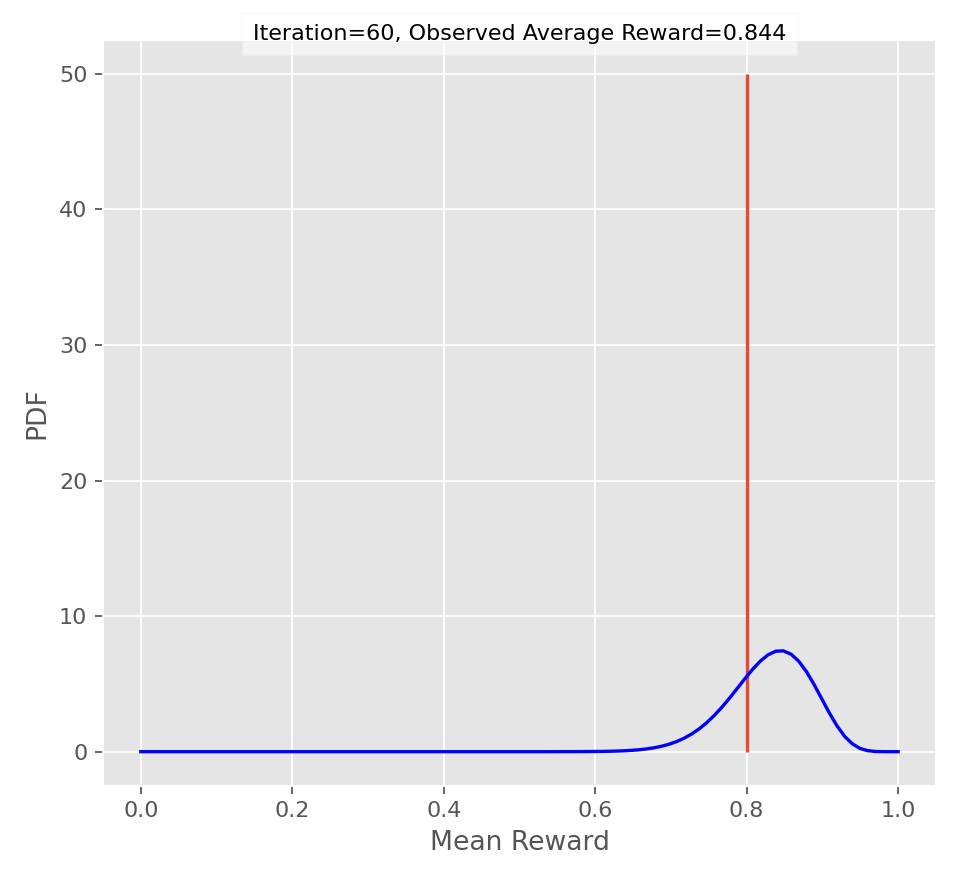

In [9]:
gg = GifGeneratorBetaBinomial()
animation = gg.create_animation(100, interval=800)
animation.save('beta_binomial_update.gif', writer='imagemagick')

In [2]:
class GifGeneratorBayesianBandit:
    def __init__(self):
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False, sharey=False)
        fig.set_size_inches(6, 5.5)
        fig.set_tight_layout(True)

        self.fig = fig
        self.camera = Camera(fig)
        
        self.ax1 = ax1
        self.ax2 = ax2
        self.ax3 = ax3
        
        self.means = [0.6, 0.7, 0.8, 0.9]
        self.colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']
        self.actions_per_iter = 2
        
    def prepare_for_run(self, iterations):
        self.agent = BayesianAgent()
        self.agent.bandits = [BernoulliBandit(p=mu) for mu in self.means]

    def update(self, current_iteration, total_iterations):  
        self.agent.take_actions(self.actions_per_iter)
        
        # axis 1: mean rewards densities
        self.ax1.text(
            0.5, 1, 'Iteration={}'.format((current_iteration + 1) * self.actions_per_iter),
            bbox={'facecolor':'w', 'alpha':0.5, 'pad':5}, 
            transform=self.ax1.transAxes,
            ha="center",
        )
        for bandit, col in zip(self.agent.bandits, self.colours):
            x, y = self.agent.get_bandit_distr(bandit)
            self.ax1.plot(x, y, col)
        self.ax1.set(xlabel='Bandit Mean Reward', ylabel='pdf')
        
        # axis 2: bandit trials        
        trials = [self.agent.rewards_log[b]['actions'] for b in self.agent.bandits]
        sns.barplot(y=[str(p) for p in self.means], x=trials, ax=self.ax2, palette=self.colours)
        self.ax2.set(
            xlabel='Bandit Trials', 
            ylabel='Bandits', 
            xlim=(0, total_iterations * self.actions_per_iter + 1)
        )
        
        # axis 3: sample mean estimate
        bandits = self.agent.bandits
        if all([self.agent.rewards_log[b]['actions'] > 0 for b in bandits]):
            sample_mean = [
                self.agent.rewards_log[b]['reward'] / self.agent.rewards_log[b]['actions']
                for b in bandits
            ]
            sns.barplot(y=[str(p) for p in self.means], x=sample_mean, ax=self.ax3, palette=self.colours)
        self.ax3.set(xlabel='Sample Mean', ylabel='Bandits')
        
        
        self.camera.snap()
      
    def create_animation(self, total_iterations, **kwargs):    
        for current_iteration in range(total_iterations):
            if current_iteration == 0:
                self.prepare_for_run(total_iterations)
            self.update(current_iteration, total_iterations)
            
        animation = self.camera.animate(**kwargs)
        return animation

<IPython.core.display.Javascript object>


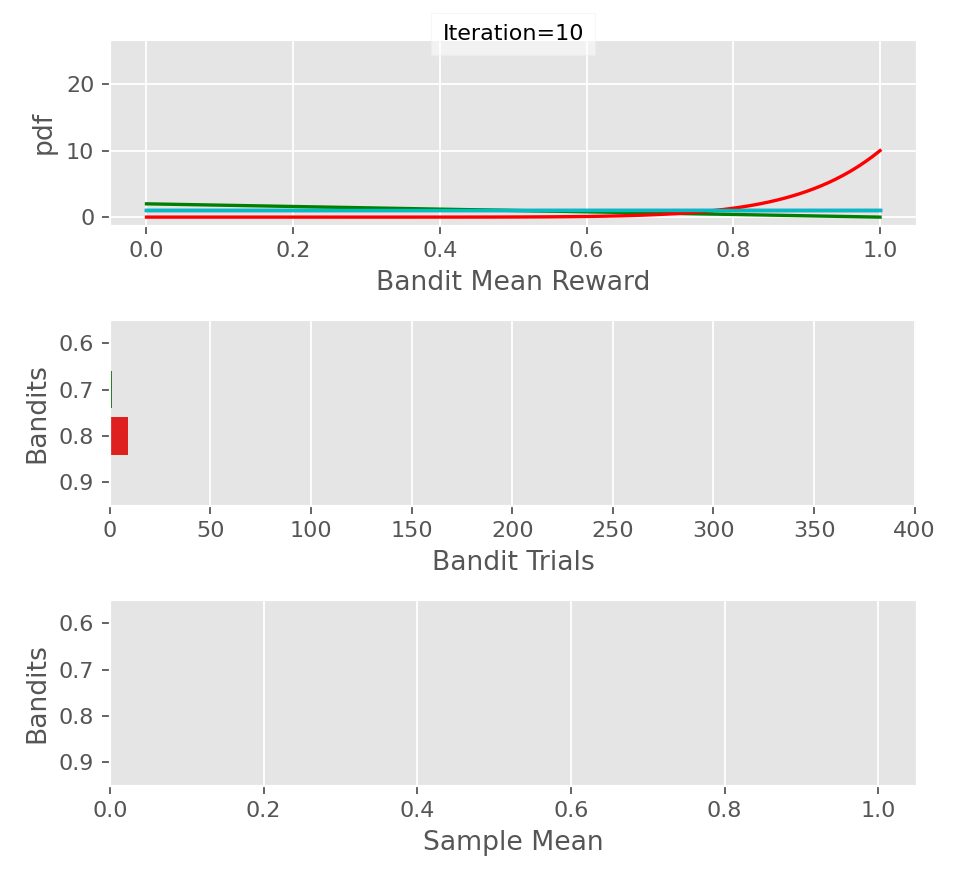

In [3]:
gg = GifGeneratorBayesianBandit()
animation = gg.create_animation(200, interval=400)
animation.save('bayesian_bandits_bernoulli.gif', writer='imagemagick')